In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import MSEplots.plots as mpt

import metpy.calc as mpcalc
from metpy.units import units
from metpy.constants import Cp_d,Lv,Rd,g 

In [2]:
from siphon.simplewebservice.wyoming import WyomingUpperAir
# reading data prociding vertical profiles of T, Td, pressure and height
date = datetime(2018, 11, 24, 12)
station = 'SKBO'

df = WyomingUpperAir.request_data(date, station)
pressure = df['pressure'].values 
Temp = df['temperature'].values 
Temp_dew = df['dewpoint'].values 
altitude = df['height'].values

from metpy.calc.thermo import *
from metpy.units import units
q = mixing_ratio(saturation_vapor_pressure(Temp_dew*units.degC),pressure*units.mbar)
q = specific_humidity_from_mixing_ratio(q)

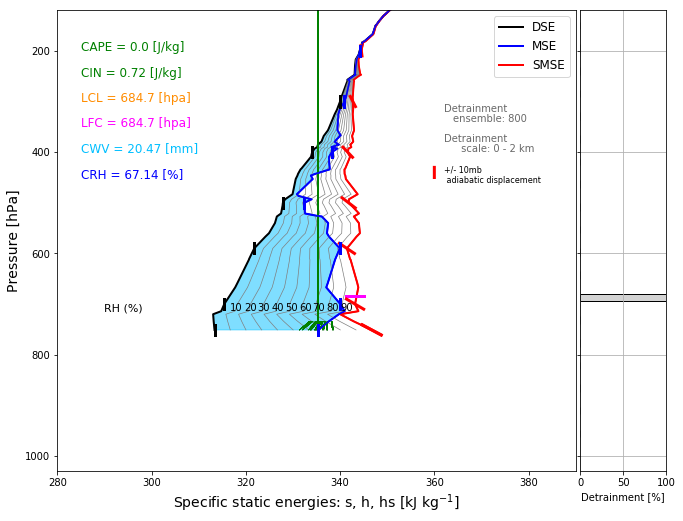

In [4]:
ax = mpt.msed_plots(pressure,Temp,q,altitude,ent_rate=np.arange(0,2,0.05),entrain=True) # altitude included

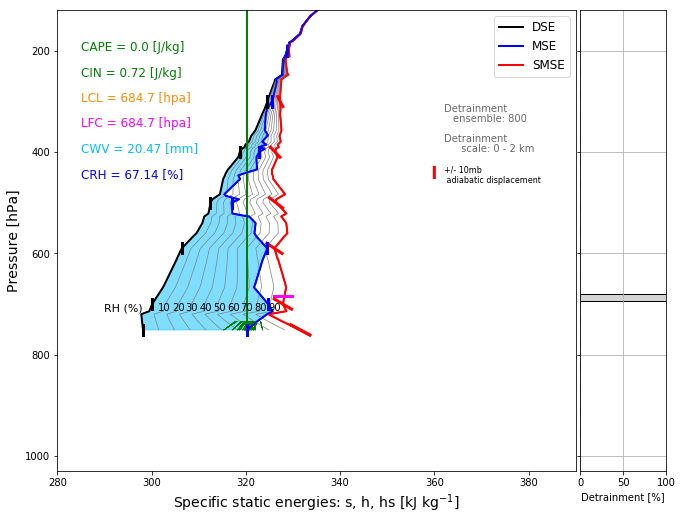

In [5]:
ax = mpt.msed_plots(pressure,Temp,q,altitude=np.array([1000]),ent_rate=np.arange(0,2,0.05),entrain=True) # altitude included